In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
path = "drive/My Drive/CombinedInput.xlsx"
df = pd.read_excel(path)

In [73]:
df.head()

,Unnamed: 0,A0A0B4J1X5,O00592,O15438,O75884,O95816,P00747,P00966,P01861,P02652,P02671,P02675,P02679,P02730,P02750,P02753,P02766,P05090,P08311,P08697,P12429,P14923,P17677,P19652,P19827,P22105,P25311,P25685,P26447,P35556,P39060,P54652,P61626,Q13510,Q14126,Q15714,Q96CN7,Q96T23,Q9BWS9,Q9UM54,Q9Y625
0,1,0.482161,0.473002,0.509935,0.545214,0.535377,0.507855,0.572658,0.627768,0.572704,0.622162,0.646808,0.630159,0.551593,0.429741,0.413356,0.573848,0.496759,0.438208,0.482986,0.568084,0.518428,0.473744,0.481524,0.429425,0.384986,0.489815,0.502149,0.516913,0.546054,0.636945,0.469058,0.503675,0.498989,0.546852,0.531698,0.462822,0.421360,0.502206,0.399124,0.539576
1,1,0.611093,0.495021,0.611706,0.464316,0.585244,0.585918,0.557084,0.703404,0.624437,0.724484,0.753363,0.746158,0.619233,0.592113,0.514353,0.623954,0.603097,0.714300,0.523701,0.676114,0.528624,0.549236,0.649329,0.551592,0.305159,0.603453,0.504922,0.655154,0.510988,0.603164,0.455294,0.752663,0.692753,0.526675,0.505984,0.512422,0.521113,0.493575,0.488063,0.529156
2,1,0.544422,0.508639,0.699819,0.467568,0.505753,0.667078,0.624651,0.662358,0.723317,0.772431,0.778523,0.775723,0.738656,0.537660,0.601254,0.695240,0.634550,0.537013,0.622484,0.417213,0.525448,0.438503,0.590120,0.620053,0.527161,0.631156,0.527476,0.494942,0.465173,0.617775,0.631569,0.593322,0.494685,0.539642,0.482494,0.546504,0.552488,0.470651,0.472605,0.564230
3,1,0.501175,0.522488,0.560591,0.576073,0.546440,0.495649,0.504929,0.540970,0.579686,0.609067,0.634594,0.536052,0.502909,0.456649,0.507768,0.577783,0.484080,0.532526,0.497208,0.643714,0.593052,0.672221,0.453051,0.532959,0.340168,0.475439,0.447628,0.480333,0.481129,0.570765,0.543252,0.539652,0.557409,0.490263,0.540621,0.496449,0.493885,0.472020,0.520375,0.529292
4,1,0.513616,0.603717,0.600744,0.498089,0.566472,0.602531,0.639247,0.659958,0.699253,0.692676,0.699870,0.691576,0.562496,0.550682,0.500400,0.569119,0.615366,0.513073,0.463757,0.634271,0.687095,0.544294,0.581788,0.498303,0.575439,0.526801,0.507870,0.541807,0.531045,0.667115,0.497157,0.536869,0.537729,0.646656,0.604936,0.464546,0.491498,0.477580,0.535413,0.521307


In [74]:
df.columns

Index(['Unnamed: 0', 'A0A0B4J1X5', 'O00592', 'O15438', 'O75884', 'O95816',
       'P00747', 'P00966', 'P01861', 'P02652', 'P02671', 'P02675', 'P02679',
       'P02730', 'P02750', 'P02753', 'P02766', 'P05090', 'P08311', 'P08697',
       'P12429', 'P14923', 'P17677', 'P19652', 'P19827', 'P22105', 'P25311',
       'P25685', 'P26447', 'P35556', 'P39060', 'P54652', 'P61626', 'Q13510',
       'Q14126', 'Q15714', 'Q96CN7', 'Q96T23', 'Q9BWS9', 'Q9UM54', 'Q9Y625'],
      dtype='object')

In [75]:
df.rename({'Unnamed: 0':'Labels'},axis = 1, inplace=True)

In [76]:
df.head()

,Labels,A0A0B4J1X5,O00592,O15438,O75884,O95816,P00747,P00966,P01861,P02652,P02671,P02675,P02679,P02730,P02750,P02753,P02766,P05090,P08311,P08697,P12429,P14923,P17677,P19652,P19827,P22105,P25311,P25685,P26447,P35556,P39060,P54652,P61626,Q13510,Q14126,Q15714,Q96CN7,Q96T23,Q9BWS9,Q9UM54,Q9Y625
0,1,0.482161,0.473002,0.509935,0.545214,0.535377,0.507855,0.572658,0.627768,0.572704,0.622162,0.646808,0.630159,0.551593,0.429741,0.413356,0.573848,0.496759,0.438208,0.482986,0.568084,0.518428,0.473744,0.481524,0.429425,0.384986,0.489815,0.502149,0.516913,0.546054,0.636945,0.469058,0.503675,0.498989,0.546852,0.531698,0.462822,0.421360,0.502206,0.399124,0.539576
1,1,0.611093,0.495021,0.611706,0.464316,0.585244,0.585918,0.557084,0.703404,0.624437,0.724484,0.753363,0.746158,0.619233,0.592113,0.514353,0.623954,0.603097,0.714300,0.523701,0.676114,0.528624,0.549236,0.649329,0.551592,0.305159,0.603453,0.504922,0.655154,0.510988,0.603164,0.455294,0.752663,0.692753,0.526675,0.505984,0.512422,0.521113,0.493575,0.488063,0.529156
2,1,0.544422,0.508639,0.699819,0.467568,0.505753,0.667078,0.624651,0.662358,0.723317,0.772431,0.778523,0.775723,0.738656,0.537660,0.601254,0.695240,0.634550,0.537013,0.622484,0.417213,0.525448,0.438503,0.590120,0.620053,0.527161,0.631156,0.527476,0.494942,0.465173,0.617775,0.631569,0.593322,0.494685,0.539642,0.482494,0.546504,0.552488,0.470651,0.472605,0.564230
3,1,0.501175,0.522488,0.560591,0.576073,0.546440,0.495649,0.504929,0.540970,0.579686,0.609067,0.634594,0.536052,0.502909,0.456649,0.507768,0.577783,0.484080,0.532526,0.497208,0.643714,0.593052,0.672221,0.453051,0.532959,0.340168,0.475439,0.447628,0.480333,0.481129,0.570765,0.543252,0.539652,0.557409,0.490263,0.540621,0.496449,0.493885,0.472020,0.520375,0.529292
4,1,0.513616,0.603717,0.600744,0.498089,0.566472,0.602531,0.639247,0.659958,0.699253,0.692676,0.699870,0.691576,0.562496,0.550682,0.500400,0.569119,0.615366,0.513073,0.463757,0.634271,0.687095,0.544294,0.581788,0.498303,0.575439,0.526801,0.507870,0.541807,0.531045,0.667115,0.497157,0.536869,0.537729,0.646656,0.604936,0.464546,0.491498,0.477580,0.535413,0.521307


In [77]:
df.shape

(46, 41)

In [78]:
correlation_matrix = df.corr()
correlation_matrix["Labels"]

Labels        1.000000
A0A0B4J1X5   -0.039601
O00592       -0.174756
O15438       -0.125332
O75884       -0.406631
O95816       -0.222994
P00747       -0.045677
P00966       -0.059868
P01861       -0.038139
P02652       -0.178073
P02671        0.175916
P02675        0.185437
P02679        0.188733
P02730        0.247770
P02750       -0.168440
P02753       -0.014502
P02766       -0.254737
P05090       -0.051799
P08311        0.172713
P08697       -0.218033
P12429       -0.023953
P14923       -0.107689
P17677        0.088421
P19652       -0.189109
P19827        0.085516
P22105       -0.135429
P25311       -0.222072
P25685       -0.040373
P26447        0.046636
P35556        0.084241
P39060        0.061054
P54652        0.249685
P61626       -0.097782
Q13510       -0.142922
Q14126        0.063669
Q15714        0.070110
Q96CN7       -0.211253
Q96T23        0.124824
Q9BWS9       -0.184866
Q9UM54       -0.254912
Q9Y625       -0.077598
Name: Labels, dtype: float64

In [79]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [80]:
df.columns

Index(['Labels', 'A0A0B4J1X5', 'O00592', 'O15438', 'O75884', 'O95816',
       'P00747', 'P00966', 'P01861', 'P02652', 'P02671', 'P02675', 'P02679',
       'P02730', 'P02750', 'P02753', 'P02766', 'P05090', 'P08311', 'P08697',
       'P12429', 'P14923', 'P17677', 'P19652', 'P19827', 'P22105', 'P25311',
       'P25685', 'P26447', 'P35556', 'P39060', 'P54652', 'P61626', 'Q13510',
       'Q14126', 'Q15714', 'Q96CN7', 'Q96T23', 'Q9BWS9', 'Q9UM54', 'Q9Y625'],
      dtype='object')

In [81]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [82]:
X

array([[0.48216094, 0.47300247, 0.50993487, ..., 0.50220551, 0.39912369,
        0.53957622],
       [0.61109321, 0.49502142, 0.61170552, ..., 0.49357527, 0.48806343,
        0.52915599],
       [0.5444217 , 0.50863902, 0.69981856, ..., 0.47065112, 0.47260506,
        0.56423002],
       ...,
       [0.57024314, 0.45268075, 0.61498703, ..., 0.42278861, 0.59261262,
        0.44881451],
       [0.58102336, 0.51905667, 0.57544172, ..., 0.42232669, 0.55824008,
        0.40849517],
       [0.4040198 , 0.37049642, 0.43537138, ..., 0.44545285, 0.50154852,
        0.47430849]])

In [83]:
X.shape

(46, 40)

In [84]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [85]:
y.shape

(46,)

In [86]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [87]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [89]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (32, 40)
Training Labels Shape: (32,)
Testing Features Shape: (14, 40)
Testing Labels Shape: (14,)


In [90]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [91]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 1 0 0 1 0 0 0 0 0]


In [92]:
print(classifier.score(X_test, y_test))

0.5


In [93]:
scores_classification = accuracy_score(y_test, y_pred)
print(scores_classification)

0.5


In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 2]
 [5 1]]


In [95]:
train_preds = classifier.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.3535533905932738

In [96]:
test_preds = classifier.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.7071067811865476

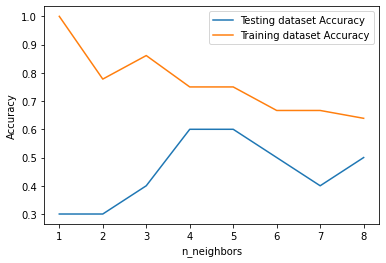

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [98]:
y_pred = knn.predict(X_test)

In [99]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted  0  1
Actual         
0          5  1
1          4  0


In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5
